# EDA

#### Imports

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

#### Load the data

In [54]:
df = pd.read_csv('/Users/riwanahas/music-recommendation-1/spotify_reco/popular_songs_metadata.csv')

#### Looking at the Data

In [55]:
df.shape

(10000, 7)

In [56]:
df.head()

,user,song,title,play_count,release,artist_name,year
0,b493eda768d25cfb48dec2567b0826cdb9f6eef4,SOCBSZW12AB01891C1,XRDS,256,Ritual Noise,Covenant,0
1,d50046ceb4db11dc162649a0da27733ff5194b47,SOAAAGQ12A8C1420C8,Orgelblut,1,Dolores,Bohren & Der Club Of Gore,2008
2,1e93ab57208a575ad87872ff3a25c1743632d0a1,SOAAAGQ12A8C1420C8,Orgelblut,1,Dolores,Bohren & Der Club Of Gore,2008
3,a0846981ab7c3d06cf1d966e7109774e306eb61a,SOAAAGQ12A8C1420C8,Orgelblut,1,Dolores,Bohren & Der Club Of Gore,2008
4,6e8d4e7d986e077d334da41638e63b9030710141,SOAAAGQ12A8C1420C8,Orgelblut,1,Dolores,Bohren & Der Club Of Gore,2008


In [57]:
df.describe()

,play_count,year
count,10000.0000,10000.000000
mean,1.0255,1611.641400
std,2.5500,791.778529
min,1.0000,0.000000
25%,1.0000,1982.000000
50%,1.0000,2001.000000
75%,1.0000,2006.000000
max,256.0000,2010.000000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user         10000 non-null  object
 1   song         10000 non-null  object
 2   title        10000 non-null  object
 3   play_count   10000 non-null  int64 
 4   release      10000 non-null  object
 5   artist_name  10000 non-null  object
 6   year         10000 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 547.0+ KB


In [59]:
df.isnull().sum()

user           0
song           0
title          0
play_count     0
release        0
artist_name    0
year           0
dtype: int64

#### Graphing the numerical data

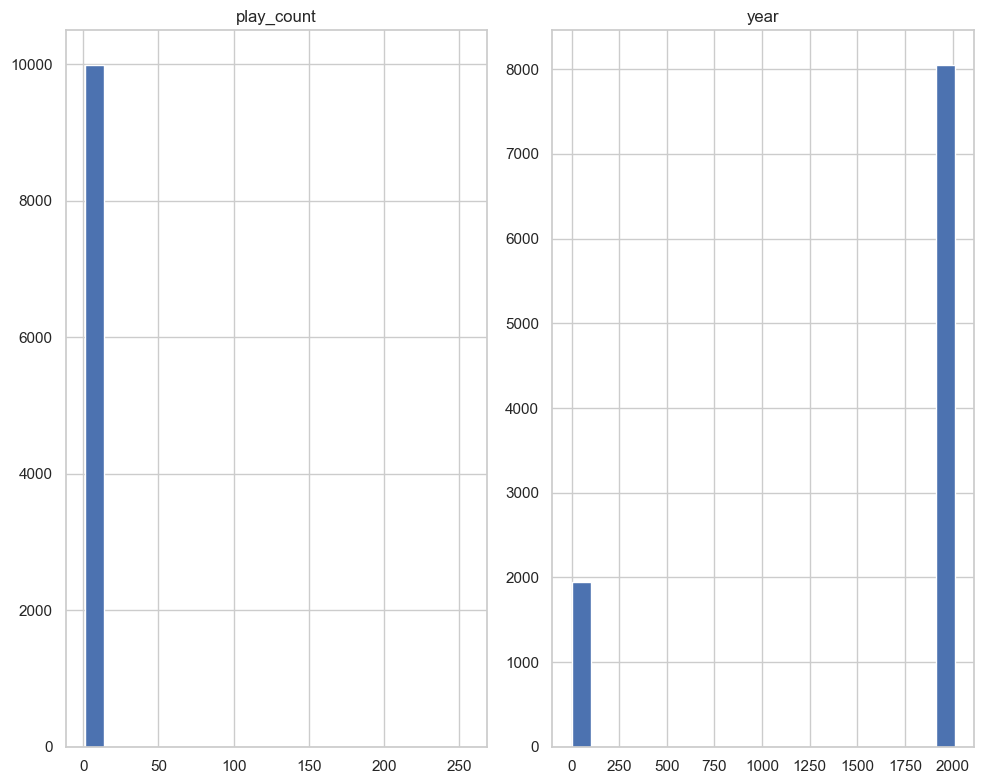

In [61]:
# Plot histograms for all numerical columns
df.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

#### Checking for zero values

In [62]:
# Checking for the presence of zero values in each column
zero_values_count = (df == 0).sum()
zero_values_count

user              0
song              0
title             0
play_count        0
release           0
artist_name       0
year           1944
dtype: int64

#### Inputing Values

In [63]:
df['year'].replace(0, np.nan, inplace=True)

# Initialize the IterativeImputer with a RandomForestRegressor estimator
imputer = IterativeImputer(estimator=RandomForestRegressor(), max_iter=10, random_state=0)

# We'll only fit the imputer on the 'year' column as the other zeros are encoded categories
year_imputed = imputer.fit_transform(df[['year']])

# Fill the imputed values back into the DataFrame
df['year'] = year_imputed
df['year'] = df['year'].round().astype(int)

# Check if the imputation is done
df['year'].isnull().sum()


0

#### Outlires

In [64]:
# Define a function to detect outliers using the IQR method
def detect_outliers_iqr(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    return outliers

# Detect outliers in 'play_count' and 'year'
outliers_play_count = detect_outliers_iqr(df, 'play_count')
outliers_year = detect_outliers_iqr(df, 'year')

# Display the number of outliers found in each column
outliers_summary = {
    'play_count_outliers': len(outliers_play_count),
    'year_outliers': len(outliers_year)
}

outliers_summary

{'play_count_outliers': 1, 'year_outliers': 1347}

#### Plotting the outlires

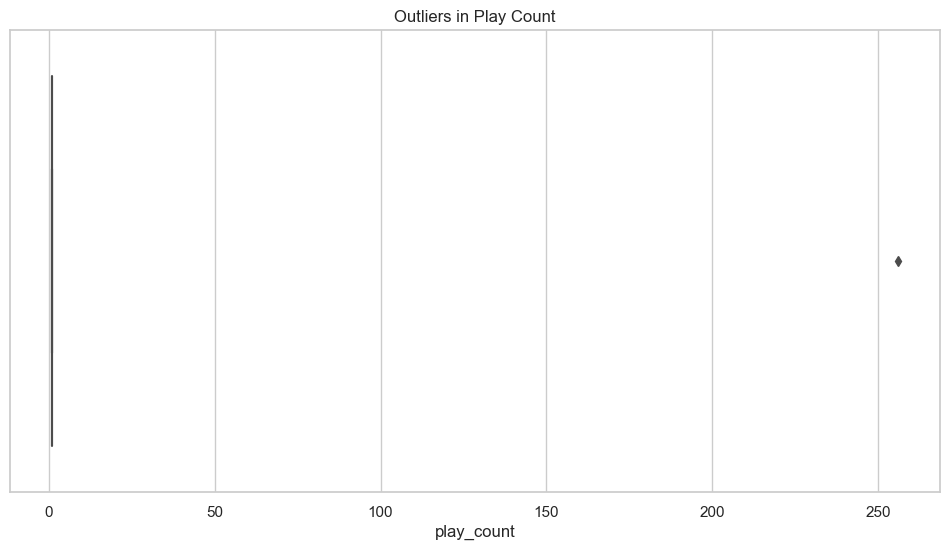

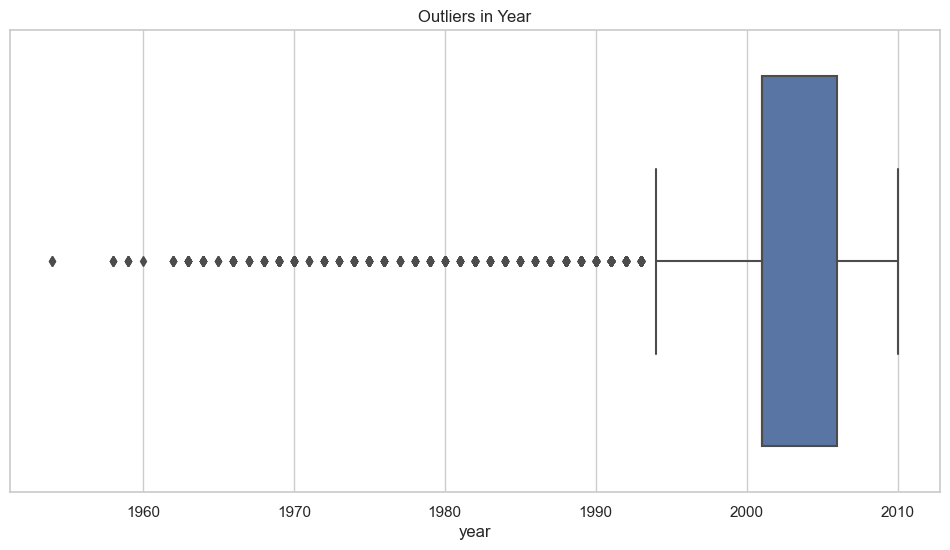

In [65]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plot outliers for 'play_count'
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['play_count'])
plt.title('Outliers in Play Count')
plt.show()

# Plot outliers for 'year'
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['year'])
plt.title('Outliers in Year')
plt.show()

- Its normal for some songs to be older and relased in earlier years so we will not deal with the outlires as they are significant to the data

- As for the play count only one stood with a high play count of a song that is above 250 times which could be seen as normal

#### Label Encoding

In [69]:
# Initialize LabelEncoder
le = LabelEncoder()

# Categorical columns for label encoding
features = ['user', 'song', 'title', 'release', 'artist_name']

# Apply LabelEncoder to each categorical column
for col in features:
    df[col] = le.fit_transform(df[col])

# Display the encoded DataFrame
df


,user,song,title,play_count,release,artist_name,year
0,6910,2851,2765,256,1765,474,2001
1,8181,0,1757,1,600,279,2008
2,1121,0,1757,1,600,279,2008
3,6100,0,1757,1,600,279,2008
4,4236,0,1757,1,600,279,2008
...,...,...,...,...,...,...,...
9995,9273,2847,1244,1,293,1984,1966
9996,9424,2848,2009,1,560,1266,2001
9997,5844,2849,1750,1,1724,2273,2006
9998,6058,2850,1773,1,414,1208,2003
